Principal Component Analyis is basically a statistical procedure to convert a set of observation of possibly correlated variables into a set of values of linearly uncorrelated variables.
Each of the principal components is chosen in such a way so that it would describe most of the still available variance and all these principal components are orthogonal to each other. In all principal components first principal component has maximum variance.

Uses of PCA:

It is used to find inter-relation between variables in the data.
It is used to interpret and visualize data.
As number of variables are decreasing it makes further analysis simpler.
It’s often used to visualize genetic distance and relatedness between populations.
These are basically performed on square symmetric matrix. It can be a pure sums of squares and cross products matrix or Covariance matrix or Correlation matrix. A correlation matrix is used if the individual variance differs much.

Objectives of PCA:

It is basically a non-dependent procedure in which it reduces attribute space from a large number of variables to a smaller number of factors.
PCA is basically a dimension reduction process but there is no guarantee that the dimension is interpretable.
Main task in this PCA is to select a subset of variables from a larger set, based on which original variables have the highest correlation with the principal amount.
Principal Axis Method: PCA basically search a linear combination of variables so that we can extract maximum variance from the variables. Once this process completes it removes it and search for another linear combination which gives an explanation about the maximum proportion of remaining variance which basically leads to orthogonal factors. In this method, we analyze total variance.




Eigenvector: It is a non-zero vector that stays parallel after matrix multiplication. Let’s suppose x is eigen vector of dimension r of matrix M with dimension r*r if Mx and x are parallel. Then we need to solve Mx=Ax where both x and A are unknown to get eigen vector and eigen values.
Under Eigen-Vectors we can say that Principal components show both common and unique variance of the variable. Basically, it is variance focused approach seeking to reproduce total variance and correlation with all components. The principal components are basically the linear combinations of the original variables weighted by their contribution to explain the variance in a particular orthogonal dimension.

Eigen Values: It is basically known as characteristic roots. It basically measures the variance in all variables which is accounted for by that factor. The ratio of eigenvalues is the ratio of explanatory importance of the factors with respect to the variables. If the factor is low then it is contributing less in explanation of variables. In simple words, it measures the amount of variance in the total given database accounted by the factor. We can calculate the factor’s eigen value as the sum of its squared factor loading for all the variables.

In [1]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


In [2]:
# importing or loading the dataset 
dataset = pd.read_csv('c:/Users/deepa/Downloads/telegram desktop/Wine.csv') 
dataset
#distributing the dataset into two components X and Y 
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values
dataset['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [3]:
# Splitting the X and Y into the 
# Training set and Testing set 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 


Step 4: Feature Scaling

Doing the pre-processing part on training and testing set such as fitting the Standard scale.

In [4]:

# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 


In [5]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.35900066, 0.18691934])

In [6]:
print(pca.components_)

[[ 0.12753249 -0.25623655 -0.02236181 -0.24428137  0.14757757  0.38490786
   0.41950095 -0.2992598   0.30843734 -0.11907301  0.29949964  0.38381622
   0.27587548]
 [-0.4928047  -0.1904464  -0.31676447  0.03513857 -0.26217161 -0.09601687
  -0.01513129 -0.07626286 -0.0738558  -0.53396728  0.28133315  0.14274046
  -0.381054  ]]


In [7]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 42) 
classifier.fit(X_train, y_train) 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test) 


In [9]:
# making confusion matrix between 
# test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred) 
cm
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

1.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


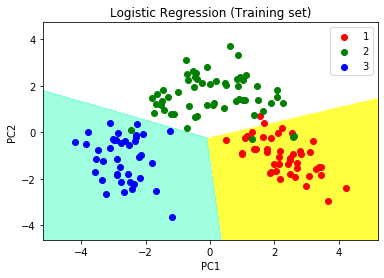

In [10]:
# Predicting the training set 
# result through scatter plot 
from matplotlib.colors import ListedColormap 

X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
					stop = X_set[:, 0].max() + 1, step = 0.01), 
					np.arange(start = X_set[:, 1].min() - 1, 
					stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
			cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 

plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 

# show scatter plot 
plt.show() 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


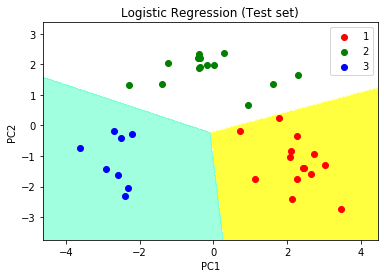

In [11]:
# Visualising the Test set results through scatter plot 
from matplotlib.colors import ListedColormap 

X_set, y_set = X_test, y_test 

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
					stop = X_set[:, 0].max() + 1, step = 0.01), 
					np.arange(start = X_set[:, 1].min() - 1, 
					stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
			cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 

# title for scatter plot 
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 

# show scatter plot 
plt.show() 
